In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv
import category_encoders as ce
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

--------------------------------------------------------------EDA---------------------------------------------------------------

In [3]:
heart_dis_pred = pd.read_csv("heart_2020_cleaned.csv")

In [4]:
heart_dis_pred.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [5]:
heart_dis_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
heart_dis_pred.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No null Values in the dataset

Text(0.5, 1.0, 'Count of Heart Diease')

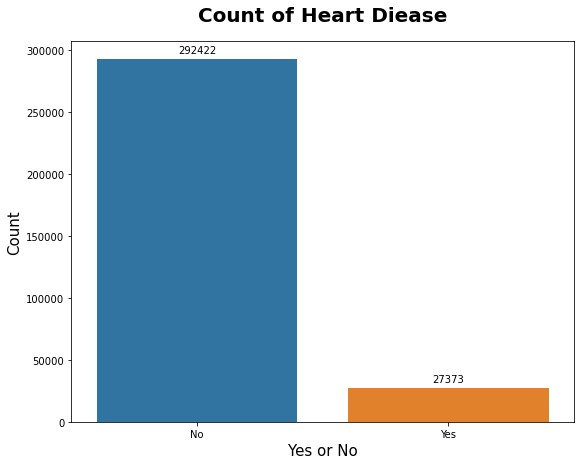

In [7]:
plt.figure(figsize=(9, 7))
status_plot = sns.countplot(x ='HeartDisease', data = heart_dis_pred)
for p in status_plot.patches:
    status_plot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.xlabel('Yes or No',fontdict={'fontsize': 15})
plt.ylabel('Count',fontdict={'fontsize': 15})
plt.title('Count of Heart Diease',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

HeartDisease     No   Yes
Smoking                  
No            55.21  3.54
Yes           36.23  5.01


Text(0.5, 1.0, 'Heart Disease relation with Smoking')

<Figure size 2160x1800 with 0 Axes>

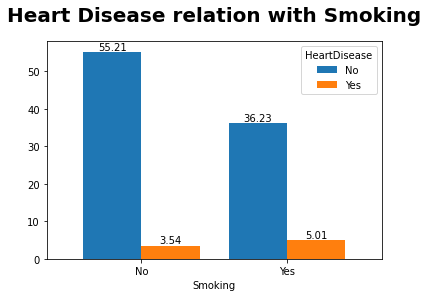

In [8]:
plt.figure(figsize=(30, 25))
CrosstabResult=pd.crosstab(index=heart_dis_pred['Smoking'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)

 
# Grouped bar chart between "Day part" and "Supply_Demand" columns
splot = r.plot.bar(width = 0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.title('Heart Disease relation with Smoking',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

HeartDisease        No   Yes
AlcoholDrinking             
No               84.99  8.20
Yes               6.45  0.36


Text(0.5, 1.0, 'Heart Disease relation with Alchol Consumption')

<Figure size 2160x1800 with 0 Axes>

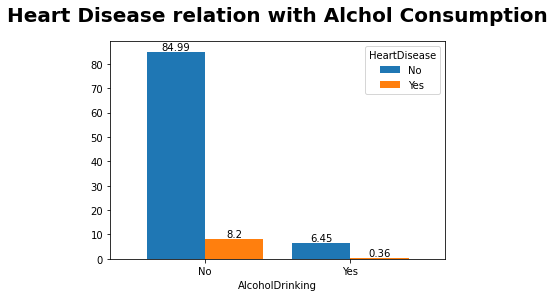

In [9]:
plt.figure(figsize=(30, 25))
CrosstabResult=pd.crosstab(index=heart_dis_pred['AlcoholDrinking'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)

 
# Grouped bar chart between "Day part" and "Supply_Demand" columns
splot = r.plot.bar(width = 0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.title('Heart Disease relation with Alchol Consumption',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

HeartDisease     No   Yes
Stroke                   
No            89.04  7.19
Yes            2.40  1.37


Text(0.5, 1.0, 'Heart Disease relation with history of Stroke')

<Figure size 2160x1800 with 0 Axes>

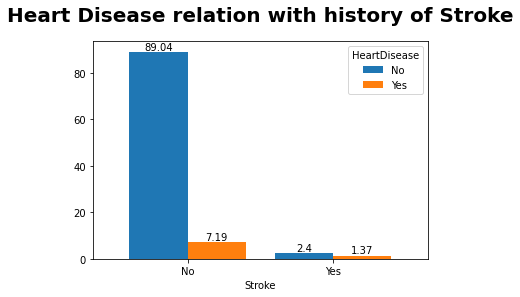

In [10]:
plt.figure(figsize=(30, 25))
CrosstabResult=pd.crosstab(index=heart_dis_pred['Stroke'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)

 
# Grouped bar chart between "Day part" and "Supply_Demand" columns
splot = r.plot.bar(width = 0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.title('Heart Disease relation with history of Stroke',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

HeartDisease     No   Yes
DiffWalking              
No            80.69  5.42
Yes           10.75  3.14


Text(0.5, 1.0, 'Heart Disease relation with Walking Difficulty')

<Figure size 2160x1800 with 0 Axes>

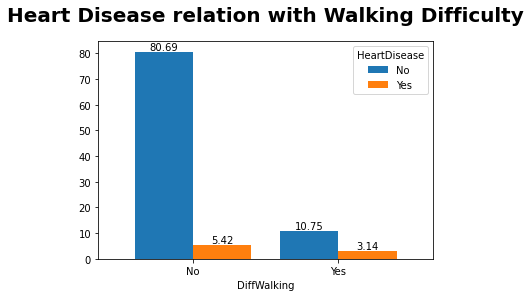

In [11]:
plt.figure(figsize=(30, 25))
CrosstabResult=pd.crosstab(index=heart_dis_pred['DiffWalking'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)

 
# Grouped bar chart between "Day part" and "Supply_Demand" columns
splot = r.plot.bar(width = 0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.title('Heart Disease relation with Walking Difficulty',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

HeartDisease     No   Yes
Asthma                   
No            79.58  7.02
Yes           11.86  1.54


Text(0.5, 1.0, 'Heart Disease relation with History of Asthma')

<Figure size 2160x1800 with 0 Axes>

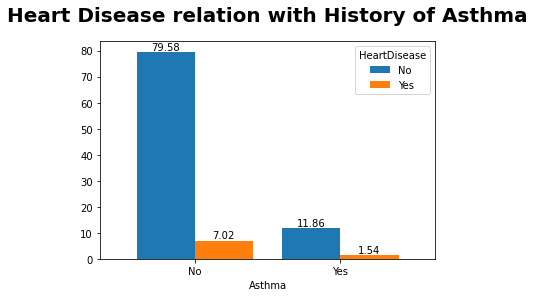

In [12]:
plt.figure(figsize=(30, 25))
CrosstabResult=pd.crosstab(index=heart_dis_pred['Asthma'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)

 
# Grouped bar chart between "Day part" and "Supply_Demand" columns
splot = r.plot.bar(width = 0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.title('Heart Disease relation with History of Asthma',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

HeartDisease      No   Yes
KidneyDisease             
No             88.84  7.48
Yes             2.60  1.08


Text(0.5, 1.0, 'Heart Disease relation with of kidney disease')

<Figure size 2160x1800 with 0 Axes>

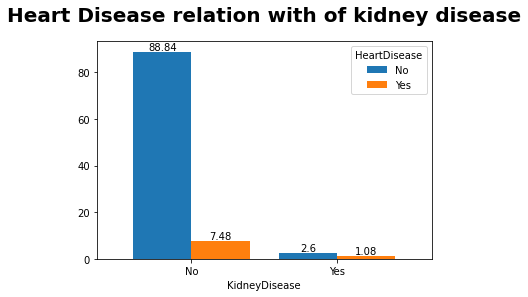

In [13]:
plt.figure(figsize=(30, 25))
CrosstabResult=pd.crosstab(index=heart_dis_pred['KidneyDisease'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)

 
# Grouped bar chart between "Day part" and "Supply_Demand" columns
splot = r.plot.bar(width = 0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.title('Heart Disease relation with of kidney disease',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

HeartDisease     No   Yes
SkinCancer               
No            83.67  7.00
Yes            7.77  1.56


Text(0.5, 1.0, 'Heart Disease relation with Skin Cancer')

<Figure size 2160x1800 with 0 Axes>

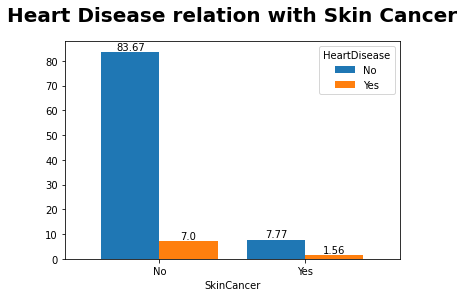

In [14]:
plt.figure(figsize=(30, 25))
CrosstabResult=pd.crosstab(index=heart_dis_pred['SkinCancer'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)

 
# Grouped bar chart between "Day part" and "Supply_Demand" columns
splot = r.plot.bar(width = 0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.title('Heart Disease relation with Skin Cancer',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

In [15]:
hdy = heart_dis_pred[heart_dis_pred["HeartDisease"]=="Yes"]

In [16]:
hdy.shape

(27373, 18)

In [17]:
hdn = heart_dis_pred[heart_dis_pred["HeartDisease"]=="No"]

In [18]:
hdn.shape

(292422, 18)

C:\Users\chemb\AppData\Local\Temp/ipykernel_12956/1122404004.py:14: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2.0)


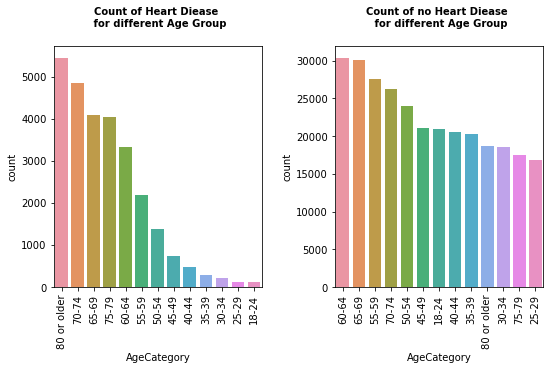

In [19]:
plt.rcParams["figure.figsize"] = (8,5.5)
plt.subplot(1, 2, 1)
status_plot1 = sns.countplot(x ='AgeCategory', data = hdy,order = hdy['AgeCategory'].value_counts().index)

plt.xticks(rotation = 90)
plt.title('Count of Heart Diease \n for different Age Group',
          fontweight="bold",fontdict={'fontsize': 10},pad=20)
plt.subplot(1, 2, 2)
status_plot2 = sns.countplot(x ='AgeCategory', data = hdn,order = hdn['AgeCategory'].value_counts().index)

plt.xticks(rotation = 90)
plt.title('Count of no Heart Diease \n for different Age Group',
          fontweight="bold",fontdict={'fontsize': 10},pad=20)
plt.tight_layout(2.0)

HeartDisease    No   Yes
AgeCategory             
18-24         6.55  0.04
25-29         5.26  0.04
30-34         5.79  0.07
35-39         6.33  0.09
40-44         6.42  0.15
45-49         6.58  0.23
50-54         7.50  0.43
55-59         8.62  0.69
60-64         9.49  1.04
65-69         9.40  1.28
70-74         8.20  1.52
75-79         5.45  1.27
80 or older   5.85  1.70


Text(0.5, 1.0, 'Heart Disease relation with Age Category')

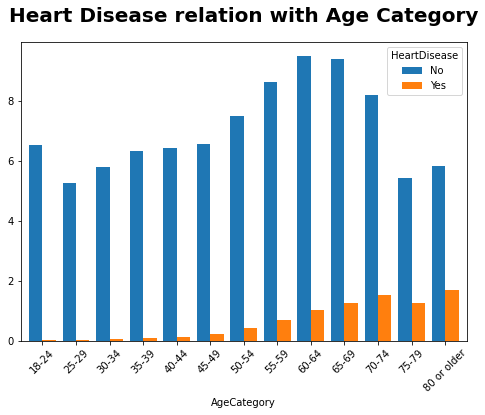

In [20]:
plt.rcParams["figure.figsize"] = (8,5.5)
CrosstabResult=pd.crosstab(index=heart_dis_pred['AgeCategory'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)
splot = r.plot.bar(width = 0.8)
plt.xticks(rotation = 45)
plt.title('Heart Disease relation with Age Category',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

HeartDisease                       No   Yes
Race                                       
American Indian/Alaskan Native   1.46  0.17
Asian                            2.44  0.08
Black                            6.63  0.54
Hispanic                         8.13  0.45
Other                            3.14  0.28
White                           69.64  7.04


Text(0.5, 1.0, 'Heart Disease relation with Race')

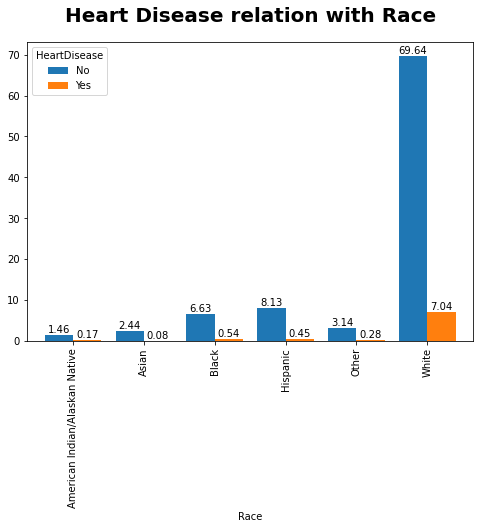

In [21]:
plt.rcParams["figure.figsize"] = (8,5.5)
CrosstabResult=pd.crosstab(index=heart_dis_pred['Race'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)
splot = r.plot.bar(width = 0.8)

for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 90)
plt.title('Heart Disease relation with Race',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

HeartDisease                No   Yes
Diabetic                            
No                       78.84  5.48
No, borderline diabetes   1.87  0.25
Yes                       9.96  2.80
Yes (during pregnancy)    0.77  0.03


Text(0.5, 1.0, 'Heart Disease relation with Diabeties')

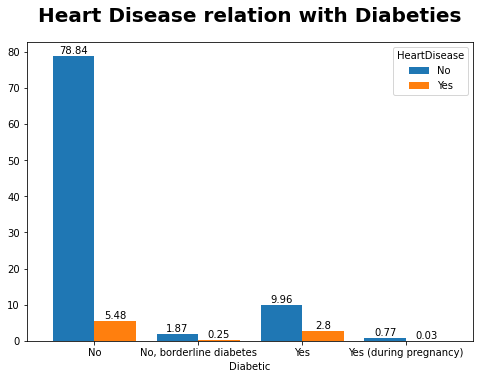

In [22]:
plt.rcParams["figure.figsize"] = (8,5.5)
CrosstabResult=pd.crosstab(index=heart_dis_pred['Diabetic'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)
splot = r.plot.bar(width = 0.8)

for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.title('Heart Disease relation with Diabeties',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

HeartDisease     No   Yes
GenHealth                
Excellent     20.43  0.47
Fair           8.63  2.22
Good          26.13  2.99
Poor           2.33  1.20
Very good     33.92  1.68


Text(0.5, 1.0, 'Heart Disease relation with Diabeties')

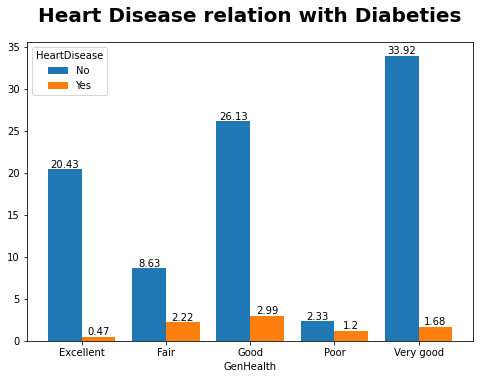

In [23]:
plt.rcParams["figure.figsize"] = (8,5.5)
CrosstabResult=pd.crosstab(index=heart_dis_pred['GenHealth'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)
splot = r.plot.bar(width = 0.8)

for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.title('Heart Disease relation with Diabeties',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

HeartDisease     No   Yes
Sex                      
Female        48.96  3.51
Male          42.48  5.05


Text(0.5, 1.0, 'Heart Disease relation with Sex')

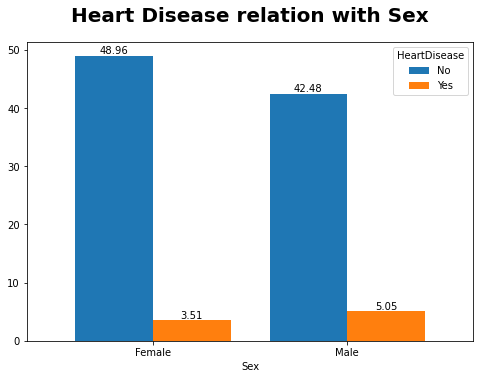

In [24]:
plt.rcParams["figure.figsize"] = (8,5.5)
CrosstabResult=pd.crosstab(index=heart_dis_pred['Sex'],columns=heart_dis_pred['HeartDisease'],normalize="all")
r = (round(CrosstabResult*100,2))
print(r)
splot = r.plot.bar(width = 0.8)

for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.title('Heart Disease relation with Sex',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

In [25]:
num_f = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
heart_dis_pred.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


<AxesSubplot:>

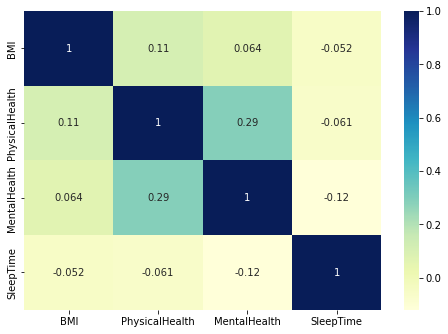

In [26]:
d = heart_dis_pred.corr()
sns.heatmap(d,annot=True,cmap="YlGnBu")

C:\Users\chemb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


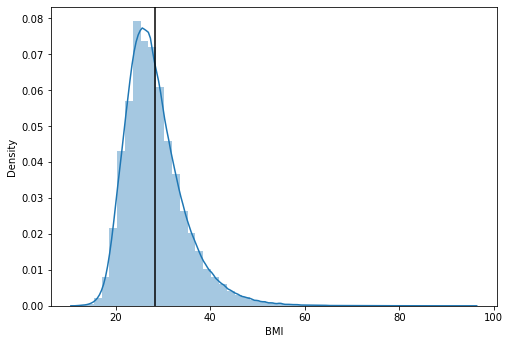

In [27]:
sns.distplot(a=heart_dis_pred["BMI"])
plt.axvline(heart_dis_pred["BMI"].mean(),c="Black")

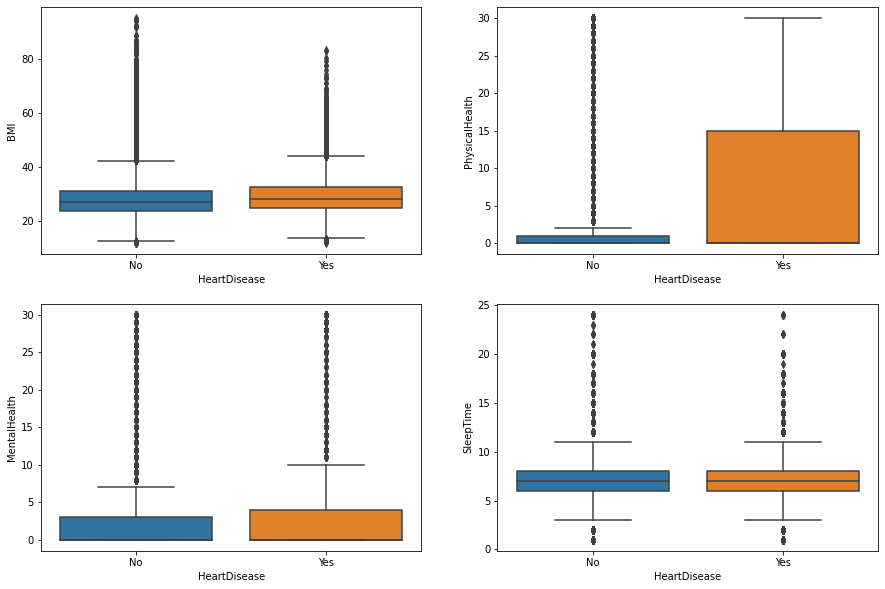

In [28]:
plt.figure(figsize=(15,10))
for i, num in enumerate(num_f):
    plt.subplot(2,2, i+1)
    sns.boxplot(y=heart_dis_pred[num], x=heart_dis_pred['HeartDisease'])

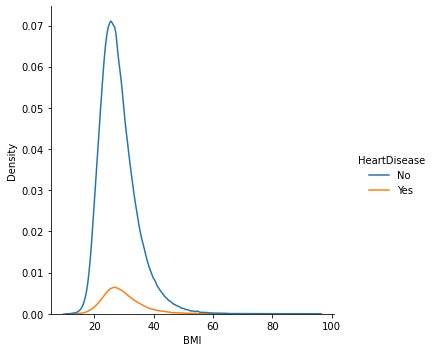

In [29]:
sns.displot(data=heart_dis_pred, x="BMI", hue="HeartDisease", kind="kde")

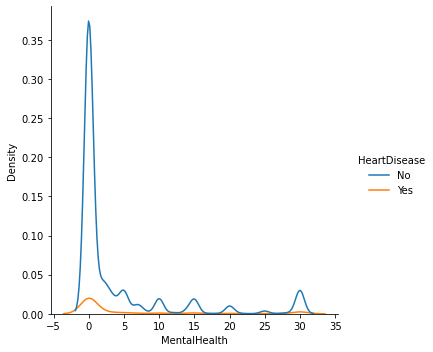

In [30]:
sns.displot(data=heart_dis_pred, x="MentalHealth", hue="HeartDisease", kind="kde")

(array([251958.,  20691.,   6823.,   5718.,   3589.,   5257.,   3418.,
           761.,   1297.,  20283.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

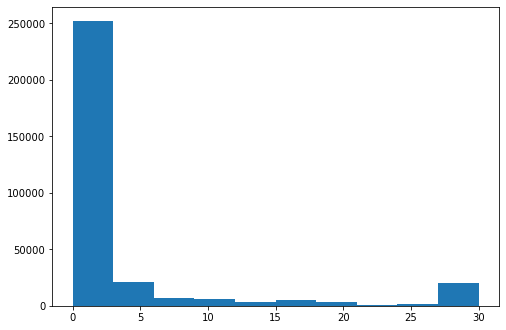

In [31]:
plt.hist(heart_dis_pred["PhysicalHealth"],bins=10)

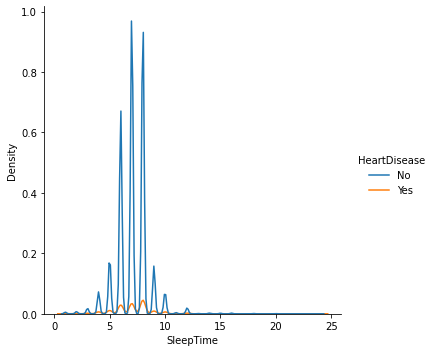

In [32]:
sns.displot(data=heart_dis_pred, x="SleepTime", hue="HeartDisease", kind="kde")

<AxesSubplot:xlabel='SleepTime', ylabel='Percent'>

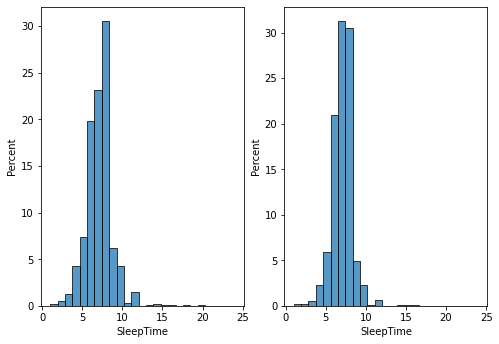

In [33]:
plt.rcParams["figure.figsize"] = (8,5.5)
plt.subplot(1, 2, 1)
sns.histplot(hdy.SleepTime, bins = 25,stat="percent")
plt.subplot(1, 2, 2)
sns.histplot(hdn.SleepTime, bins = 25,stat="percent")

<AxesSubplot:xlabel='SleepTime', ylabel='Percent'>

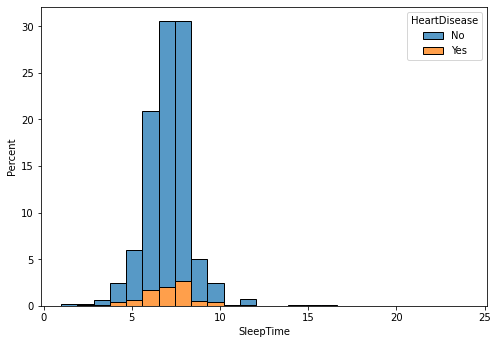

In [34]:
sns.histplot(data=heart_dis_pred, x="SleepTime", hue="HeartDisease",bins=25,multiple="stack",stat="percent")

<AxesSubplot:xlabel='MentalHealth', ylabel='Percent'>

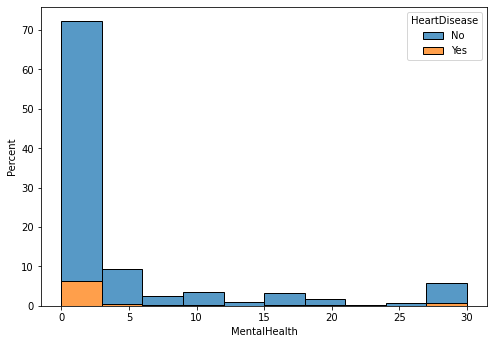

In [35]:
sns.histplot(data=heart_dis_pred, x="MentalHealth", hue="HeartDisease",bins=10,multiple="stack",stat="percent")

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Percent'>

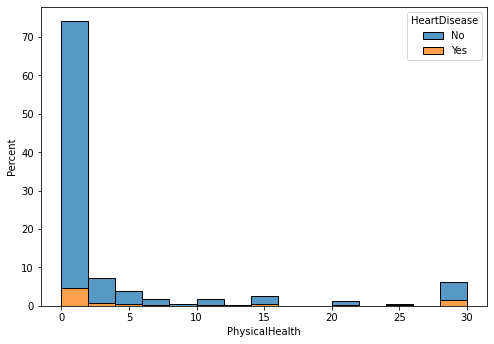

In [36]:
sns.histplot(data=heart_dis_pred, x="PhysicalHealth", hue="HeartDisease",bins=15,multiple="stack",stat="percent")

<AxesSubplot:xlabel='BMI', ylabel='Percent'>

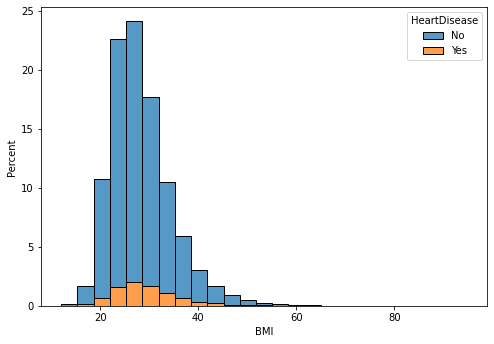

In [37]:
sns.histplot(data=heart_dis_pred, x="BMI", hue="HeartDisease",bins=25,multiple="stack",stat="percent")

In [38]:
pip install dython

In [39]:
from dython.nominal import associations

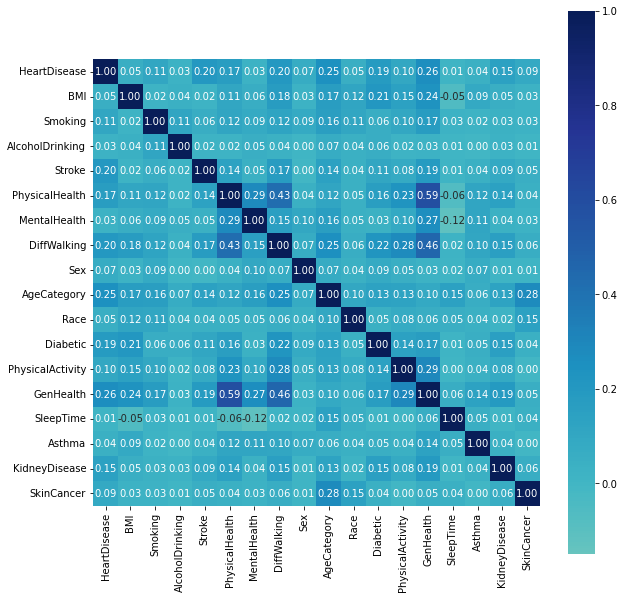

In [40]:
complete_correlation= associations(heart_dis_pred, figsize=(10,10),cmap="YlGnBu",vmin=-0.15)

In [41]:
print("EDA Done !!!")
heart_dis_pred.to_csv('heart_cleaned_eda.csv')

EDA Done !!!


In [42]:
# my_report = sv.analyze(heart_dis_pred)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [43]:
# profile = ProfileReport(heart_dis_pred, title="Pandas Profiling Report")
# profile.to_widgets()
# profile.to_file("Pandas_Profiling.html")

------------------------------------------------------------------------------------------------------------------------------